In [10]:
import numpy as np
from random import random
from copy import deepcopy
import torch 
import torch.nn as nn 



In [11]:
A = np.array([[1.8,-0.77],[1,0]])
B = np.array([[1],
              [0]])
C = np.array([1,0.8])
gama = 0.97
alpha_c = 0.1
lam = 0.65

In [12]:
Actor = nn.Sequential(
    nn.Linear(2, 10),
    nn.Tanh(),
    nn.Linear(10, 1)
    )
Actor.load_state_dict(torch.load("weights/actor_param.pt"))

<All keys matched successfully>

In [13]:
xlog_model = []
xk = np.array([5.0,5.0])
ulogs = []
for j in range(200):
    uk = Actor(torch.tensor(xk).float()).detach().numpy()
    
    xk = A@xk + B@uk
    xlog_model.append(np.linalg.norm(xk))

In [14]:
xk = np.array([5.0,5.0])
uk = np.array([0.0])
xlogs = []
for i in range(50):
    
    xk = A@xk + B@uk
    xlogs.append(np.linalg.norm(xk))


/home/akshit/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


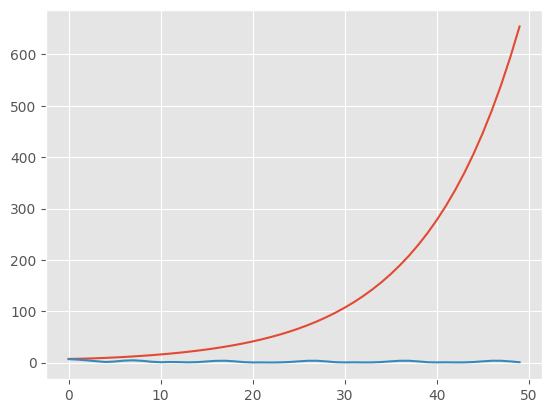

In [15]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, ax = plt.subplots()
l = 50
ax.plot(np.arange(l),xlogs[:l])
ax.plot(np.arange(len(xlog_model))[:l],xlog_model[:l])
# ax.plot(np.)
# ax.plot(np.arange(l),np.array(xlogs)-np.array(xlog_model))

Text(0, 0.5, 'iteration')

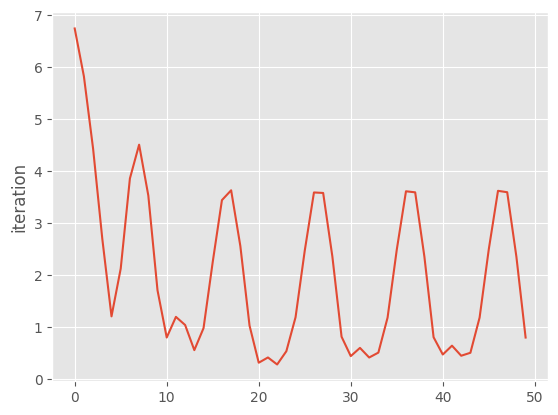

In [16]:
xk = np.array([5.0,5.0])
uk = np.array([0.0])
xlogs = []
fig,ax = plt.subplots()
for i in range(50):
    
    xk = A@xk + B@uk
    xlogs.append(np.linalg.norm(xk))
ax.plot(np.arange(len(xlog_model))[:l],xlog_model[:l])
ax.set_ylabel('x-norm')
ax.set_ylabel('iteration')

In [23]:
Actor2 = nn.Sequential(
    nn.Linear(2, 10),
    nn.Tanh(),
    nn.Linear(10, 1)
    )
Actor2.load_state_dict(torch.load("weights/actor_param_2.pt"))

<All keys matched successfully>

In [24]:
xlog_model = []
xk = np.array([5.0,5.0])
ulogs = []
for j in range(200):
    uk = Actor2(torch.tensor(xk).float()).detach().numpy()
    
    xk = A@xk + B@uk
    xlog_model.append(np.linalg.norm(xk))

Text(0, 0.5, 'iteration')

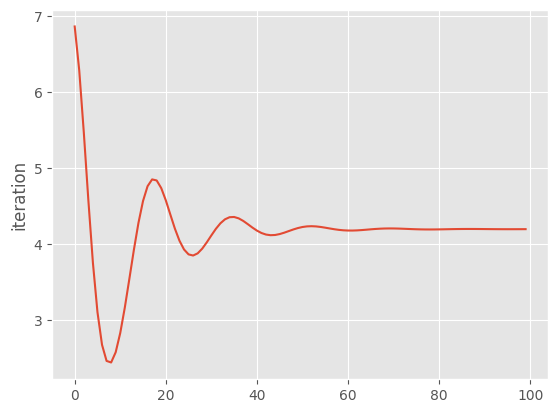

In [25]:
xk = np.array([5.0,5.0])
uk = np.array([0.0])
l = 100
xlogs = []
fig,ax = plt.subplots()
for i in range(50):
    
    xk = A@xk + B@uk
    xlogs.append(np.linalg.norm(xk))
ax.plot(np.arange(len(xlog_model))[:l],xlog_model[:l])
ax.set_ylabel('x-norm')
ax.set_ylabel('iteration')